In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [310]:
file = open("../results/cost.csv")
cost = pd.read_csv(file, sep=' ', index_col=False)
file = open("../results/time.csv")
time = pd.read_csv(file, sep=' ', index_col=False)


In [311]:
cost=cost.sort_values(by=["size"])
time=time.sort_values(by=["size"])

In [312]:
cost

,size,Matrix,Split,VSplit,EdgeSplit,SideEx,SimpleG,TriScore,TriScoreMargin,TriScoreNaive
0,4,168,168,168,168,168,168,168,168,168
2,4,82,82,82,82,82,82,82,82,82
5,4,154,154,154,154,156,154,154,154,156
1,6,482,482,482,482,492,482,514,514,544
3,6,378,378,378,378,384,378,378,378,378
4,6,1820,1820,1820,1820,1847,1820,2848,2848,3016


In [302]:
time

,size,Matrix,Split,VSplit,EdgeSplit,SideEx,SimpleG,TriScore,TriScoreMargin,TriScoreNaive
0,4,0.000371,0.001060,0.000651,0.000122,0.000009,0.000209,0.000012,0.000778,0.000002
2,4,0.000178,0.000488,0.000517,0.000095,0.000005,0.000161,0.000009,0.000583,0.000002
5,4,0.000234,0.000654,0.000526,0.000092,0.000012,0.000178,0.000009,0.000633,0.000003
1,6,0.026878,0.024931,0.022649,0.000308,0.000008,0.001969,0.000017,0.610087,0.000002
3,6,0.027782,0.024926,0.022020,0.000360,0.000011,0.002065,0.000016,0.625605,0.000003
4,6,0.023812,0.025668,0.022235,0.000537,0.000014,0.003782,0.000028,0.775454,0.000005


In [316]:
def plot_by_size(df):
    #on crée un plot
    plt.figure(figsize=(15,12), dpi=80)
    plt.xlabel("Size", size=14)
    plt.xticks(np.arange(0, df["size"].max()+1, 1), fontsize=12)

    plt.ylabel("Performances", size=14)
    plt.yticks(fontsize=12)
    plt.title("Performances per algorithm depending on instance size", size = 16)
    
    legend = []

    #plt.savefig("images/" + in_col + '.png', bbox_inches='tight')
    
    #pour chaque colonne
    for algo in df.columns[1:]:
        #on récupère la bonne colonne et la taille des instances
        dfalgo = df[["size", algo]]
        
        #on récupère le nombre d'instance de chaque taille 
        amount = [0]*(dfalgo["size"].max()+1)
        for index in (dfalgo["size"]).to_numpy():
            amount[index]+=1
            
        #on filtre les résultats invalides
        dfalgo = dfalgo[dfalgo[algo] > 0]
        
        #liste de tailles
        x=(dfalgo["size"]).to_numpy()
        #liste de résultats correspondant
        y=(dfalgo[algo]).to_numpy()
        
        avgy=[0]*len(amount)
        #on commence par faire la somme des résultats pour chaque taille
        for i in range(len(x)):
            avgy[x[i]] += y[i]
        
        #puis on divise pour obtenir la moyenne des résultats pour chaque taille
        for i in range(len(avgy)):
            avgy[i] /= max(amount[i], 1)
            
        #on supprime à nouveau les valeurs invalides
        avgy = [val for val in avgy if val > 0]
        #on supprime les doublons
        uniquex = np.unique(x)
        
        plt.plot(uniquex, avgy)
        legend.append(algo)
        
    #on plot
    plt.legend(legend)
    plt.show()

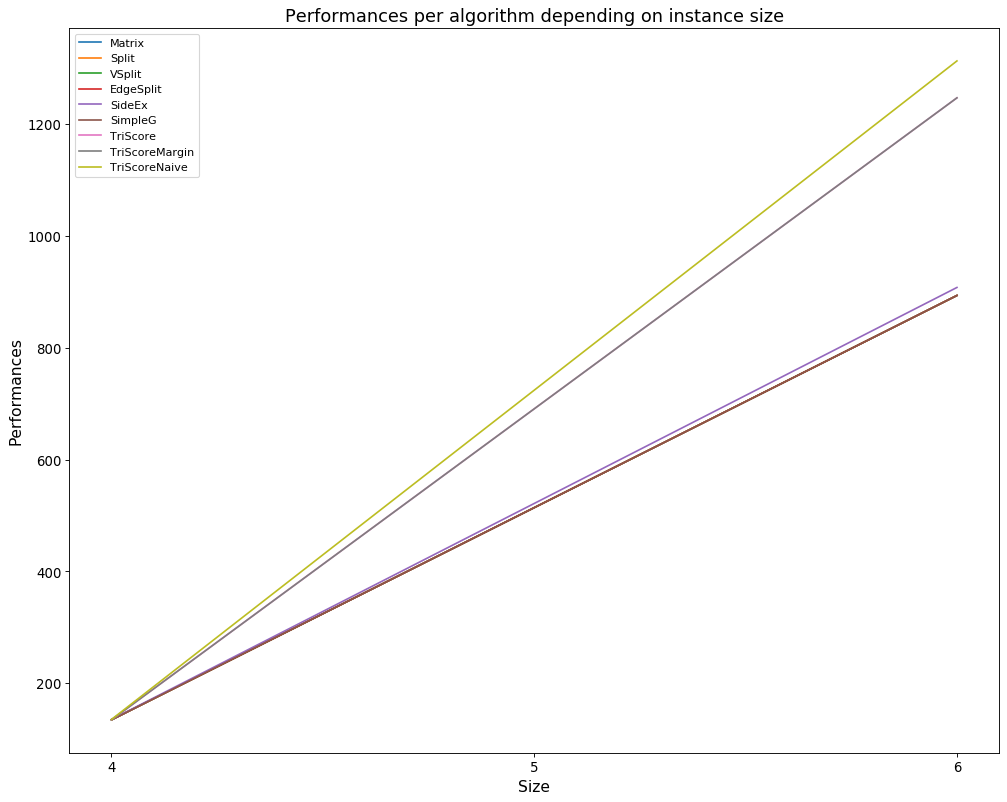

In [317]:
plot_by_size(cost)

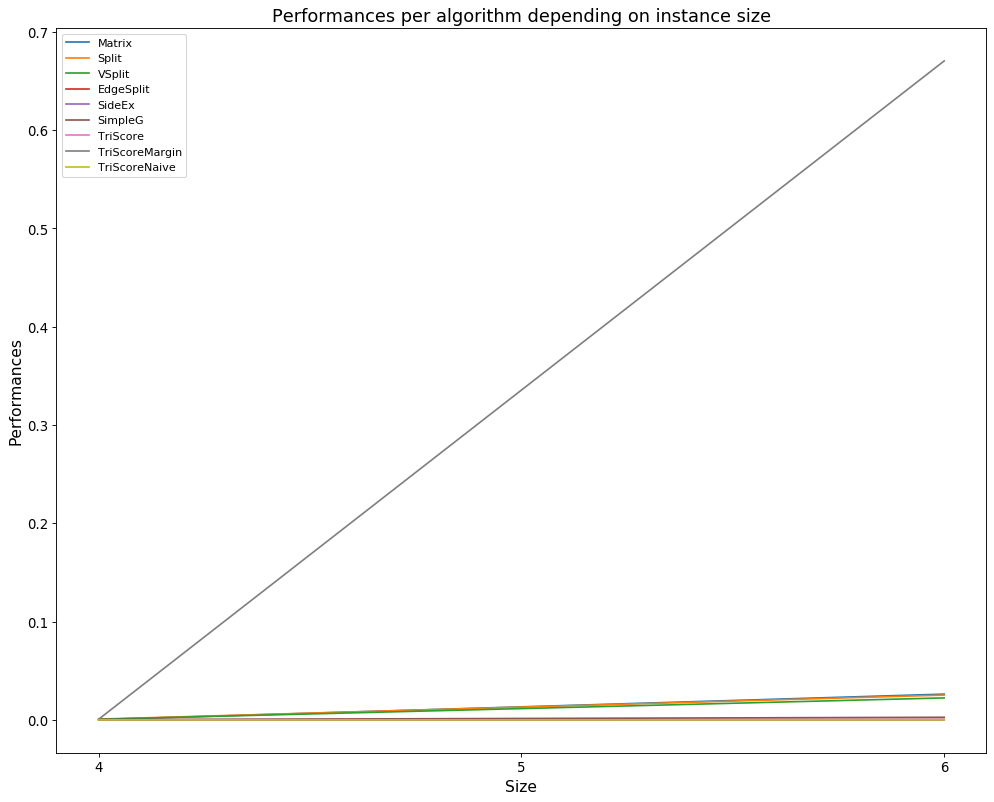

In [305]:
plot_by_size(time)